<a href="https://colab.research.google.com/github/calamitousprincesss/Movie-Rating-Prediction-/blob/main/MovieRatingPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

In [ ]:
#loading dataset
import pandas as pd
mydata= pd.read_csv('/content/movieIndia.csv')

In [ ]:
mydata.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
mydata.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
mydata.describe(include=["float64","object"])

,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,5657.000000,5657.000000,5657,5657.000000,5657.000000,5657.000000,5657.000000
unique,NaN,NaN,2027,NaN,NaN,NaN,NaN
top,NaN,NaN,7,NaN,NaN,NaN,NaN
freq,NaN,NaN,90,NaN,NaN,NaN,NaN
mean,5.897967,5.897967,NaN,5.897967,5.897967,5.897967,5.897967
std,0.587185,1.381035,NaN,1.118082,1.037178,1.060469,1.071879
min,2.400000,1.100000,NaN,1.600000,1.400000,1.600000,1.700000
25%,5.516505,5.000000,NaN,5.226829,5.322857,5.281818,5.300000
50%,5.893878,6.100000,NaN,6.000000,5.945652,5.975000,5.969231
75%,6.415521,6.900000,NaN,6.700000,6.588889,6.600000,6.575000


In [ ]:
mydata.isnull().sum()

Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [ ]:
mydata.duplicated().sum()

0

In [ ]:
mydata["Year"].unique()

array([2019, 1997, 2005, 2012, 2014, 2004, 2016, 1991, 2018, 2010, 1958,
       2021, 2017, 2009, 1993, 2002, 2008, 1994, 2007, 2003, 1998, 1979,
       1974, 2015, 2006, 1981, 2020, 1985, 2013, 2011, 1988, 1987, 1999,
       1973, 1968, 1982, 1977, 1950, 1969, 1948, 1990, 1989, 2001, 2000,
       1953, 1978, 1963, 1992, 1976, 1984, 1986, 1966, 1975, 1980, 1967,
       1970, 1952, 1972, 1971, 1964, 1954, 1962, 1957, 1965, 1996, 1995,
       1956, 1955, 1936, 1983, 1951, 1961, 1959, 1949, 1960, 1946, 1940,
       1945, 1938, 1941, 1942, 1935, 1937, 1947, 1931, 1933, 1943, 1944,
       1932, 1939, 1934])

In [ ]:
mydata['Duration'].unique()

array([109, 110, 147, 142,  82, 116,  96, 120, 161, 166, 102,  87, 132,
       105, 146, 168, 158, 126,  94, 138, 124, 144, 157, 136, 107, 113,
        80, 122, 149, 148, 130, 121, 188, 115, 103, 114, 170, 100,  99,
       140, 128,  93, 125, 145,  75, 111, 134, 104,  92, 137, 127, 119,
       135,  90, 150, 151,  95, 112, 143, 177, 117, 123,  72, 154, 175,
       153,  78, 139, 133, 180,  46, 164, 162, 171, 160, 152, 163, 165,
       141, 129, 156, 240, 172,  88, 155, 167, 106, 193, 108, 195, 174,
        81, 178,  58, 184,  97, 176, 169, 131,  77,  91,  86,  84, 173,
       118, 181, 300,  70, 101,  79,  65,  48, 183, 159,  83,  68,  89,
       201,  64, 186,  74,  85,  98,  49,  60, 207,  76, 185,  59, 187,
       216,  51,  71,  45,  73,  57, 191, 321, 199, 179,  47, 206,  63,
       211, 247,  56, 213, 210, 190, 223, 189, 224, 202,  69, 255, 197,
       182,  66, 214, 208,  21, 200, 192,  50,  54, 238,  62,  67,  52,
       204, 235, 217,  61, 250])

In [ ]:
#missing data
mydata.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
mydata= mydata.dropna(subset=["Year","Genre","Director","Actor 1","Actor 2","Actor 3","Rating"])

In [ ]:
mydata = mydata.dropna().reset_index(drop=True)

In [ ]:
mydata.shape

(5659, 10)

In [ ]:
#data cleaning
mydata["Duration"] = mydata.loc[:,"Duration"].str.replace(" min","")
mydata["Duration"] = pd.to_numeric(mydata.loc[:,"Duration"])

In [ ]:
#remove duplicated data
mydata.duplicated(subset=["Name","Year"]).sum()

2

In [ ]:
mydata=mydata.drop_duplicates(keep="first",subset=["Name","Year"]).reset_index(drop=True)

In [ ]:
mydata.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [ ]:
mydata["Year"] = mydata.loc[:,"Year"].str.extract(r"(\d{4})")
mydata["Year"] = pd.to_numeric(mydata.loc[:,"Year"])

In [ ]:
mydata["Genre"] = mydata.loc[:,"Genre"].str.replace("Musical","Music")

In [ ]:
mydata["Main_genre"] = mydata.loc[:,"Genre"].str.extract("(^\w{1,11})")

In [ ]:
mydata["Main_genre"].unique()

array(['Drama', 'Comedy', 'Horror', 'Action', 'Crime', 'Thriller',
       'Adventure', 'Sport', 'Biography', 'Documentary', 'Mystery',
       'Music', 'Romance', 'Fantasy', 'Sci', 'Family', 'History',
       'Animation', 'War'], dtype=object)

In [ ]:
#univariate analysis
iplot(px.violin(data_frame=mydata,x="Rating"))

In [ ]:
iplot(px.violin(data_frame=mydata,x="Duration"))

In [ ]:
iplot(px.violin(data_frame=mydata,x="Votes"))

In [ ]:
#genres
mydata.Genre.value_counts().reset_index()

,Genre,count
0,Drama,844
1,"Drama, Romance",332
2,"Action, Crime, Drama",328
3,"Action, Drama",206
4,"Comedy, Drama",205
...,...,...
358,"Animation, Comedy, Drama",1
359,"Family, Drama, Thriller",1
360,"Action, Music, War",1
361,"Action, Fantasy, Horror",1


In [ ]:
genres = mydata.Main_genre.value_counts().reset_index()
iplot(px.pie(data_frame=genres,names=genres.Main_genre,values=genres["count"],title="Number of movies by Genre",height=1050)\
      .update_traces(textinfo="value+percent"))

In [ ]:
#multivariate analysis
#highest rated genre
mydata.groupby("Main_genre")["Rating"].mean().sort_values(ascending = False)

Main_genre
Documentary    7.608333
History        7.225000
Biography      6.680723
Sci            6.325000
Family         6.296154
Fantasy        6.251613
Drama          6.248697
Adventure      6.181905
Music          6.139785
Crime          6.124723
Animation      6.072500
Mystery        5.854237
Comedy         5.838423
Sport          5.800000
Romance        5.598742
Action         5.511145
Thriller       5.332584
Horror         4.687500
War            4.333333
Name: Rating, dtype: float64

In [ ]:
rating_by_genre = mydata.groupby("Main_genre")["Rating"].mean().sort_values(ascending = False)
iplot(px.bar(data_frame=rating_by_genre))

In [ ]:
#time analysis
movies_by_year = mydata["Year"].value_counts().reset_index().sort_values(by="Year")

iplot(px.line(data_frame=movies_by_year,x="Year",y="count",title="Number of Movies over the years",\
              color_discrete_sequence=["green"]))

In [ ]:
#rating and number of votes over year
Rating_by_years = mydata.groupby("Year").agg({"Rating":"mean","Votes":"sum"}).reset_index()
iplot(px.line(data_frame=Rating_by_years,x="Year",y="Rating",markers=True,color_discrete_sequence=["green"],height=400))

In [ ]:
def top_10_rating(col):
    return mydata.groupby(col)["Rating"].agg(["mean","count"])\
    .query("count >=10")\
    .sort_values(by="mean",ascending=False)[:10]\
    .reset_index()

In [ ]:
top_10_director = top_10_rating("Director")

iplot(px.bar(data_frame=top_10_director,x="Director",y="mean",text="count",labels = {'mean':'Rating','count':'Number of movies'},\
            title="Top 10 Directors with more than 10 movies by rating"))

In [ ]:
top_10_actors1 = top_10_rating("Actor 1")

iplot(px.bar(data_frame=top_10_actors1,x="Actor 1",y="mean",text="count",\
    labels = {'Actor 1':'Main Actor','mean':'Rating','count':'Number of movies'},\
             title="Top 10 Main actors with more than 10 movies by rating"))

In [ ]:
top_10_actors2 = top_10_rating("Actor 2")

iplot(px.bar(data_frame=top_10_actors2,x="Actor 2",y="mean",text="count",labels = {'mean':'Rating','count':'Number of movies'},\
            title="Top 10 secondary actors with more than 10 movies by rating"))

In [ ]:
top_10_actors3 = top_10_rating("Actor 3")

iplot(px.bar(data_frame=top_10_actors3,x="Actor 3",y="mean",text="count",labels = {'mean':'Rating','count':'Number of movies'},\
            title="Top 10 Third main actors with more than 10 movies by rating"))

In [ ]:
#import libraries and data transformation
from sklearn.model_selection import train_test_split,cross_val_score
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.preprocessing import RobustScaler,StandardScaler,MaxAbsScaler,MinMaxScaler
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
import sklearn.metrics as metrics


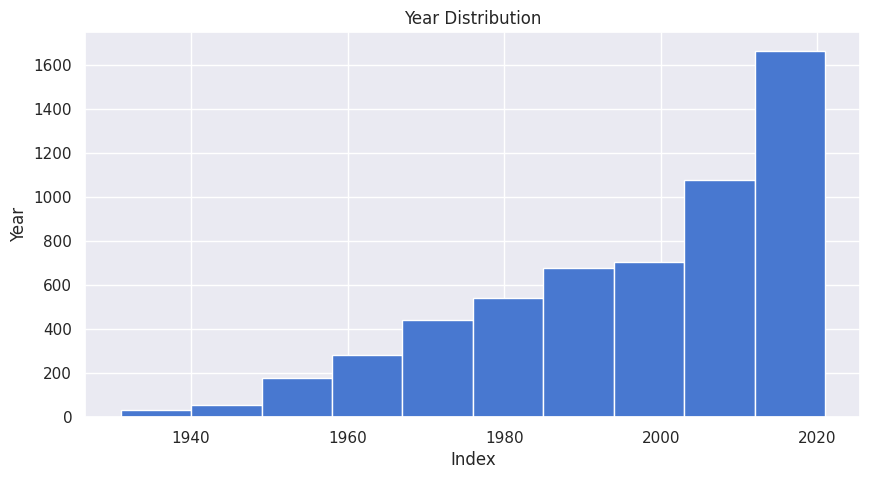

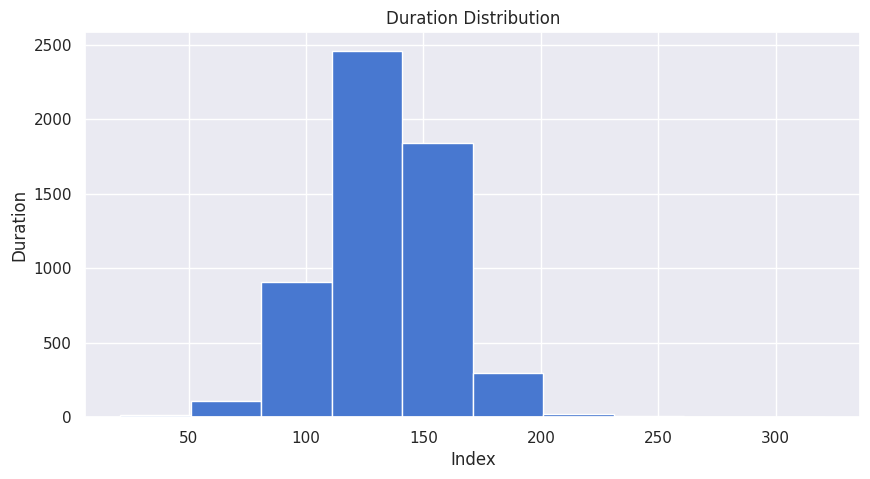

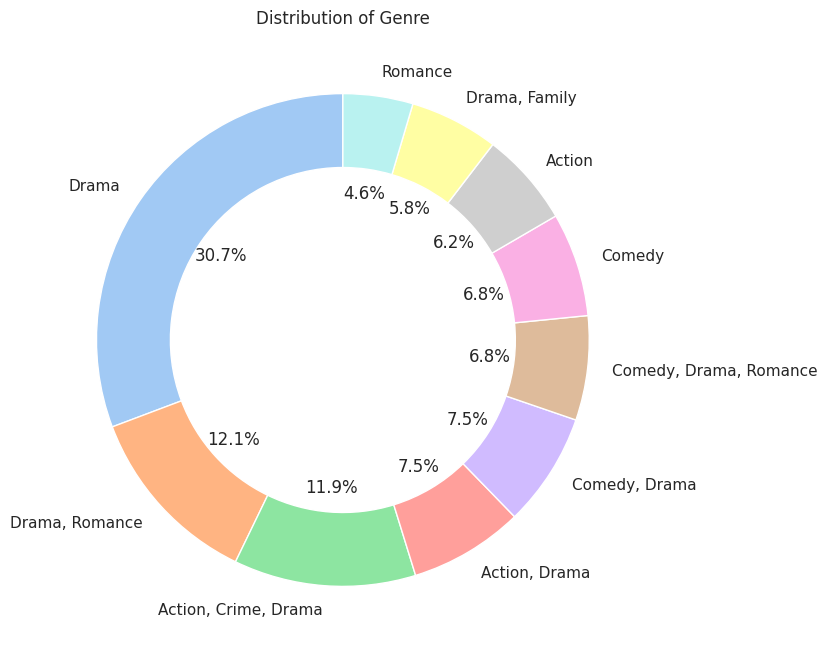

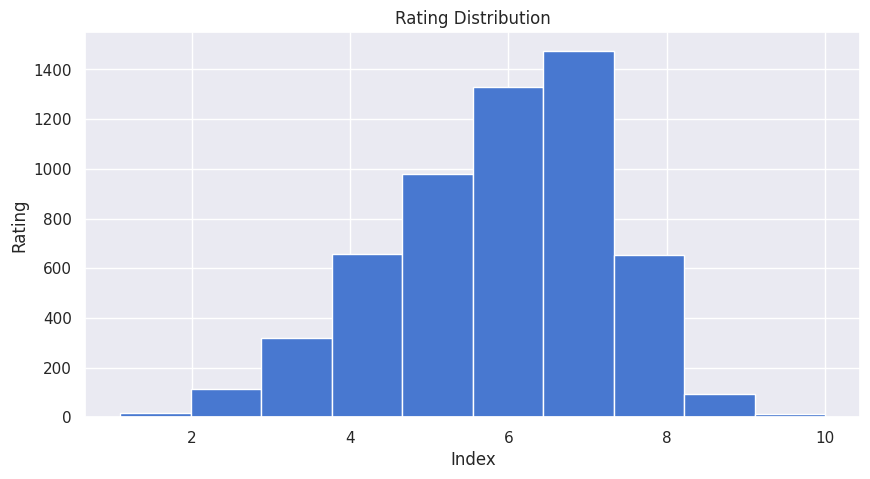

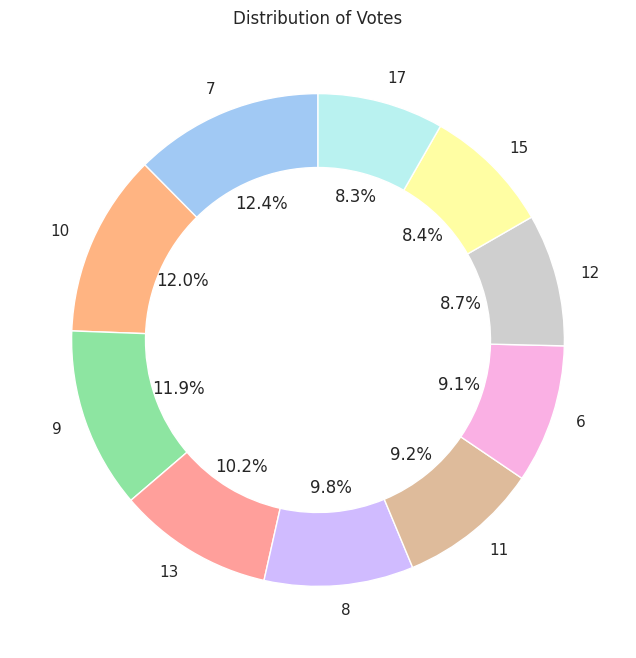

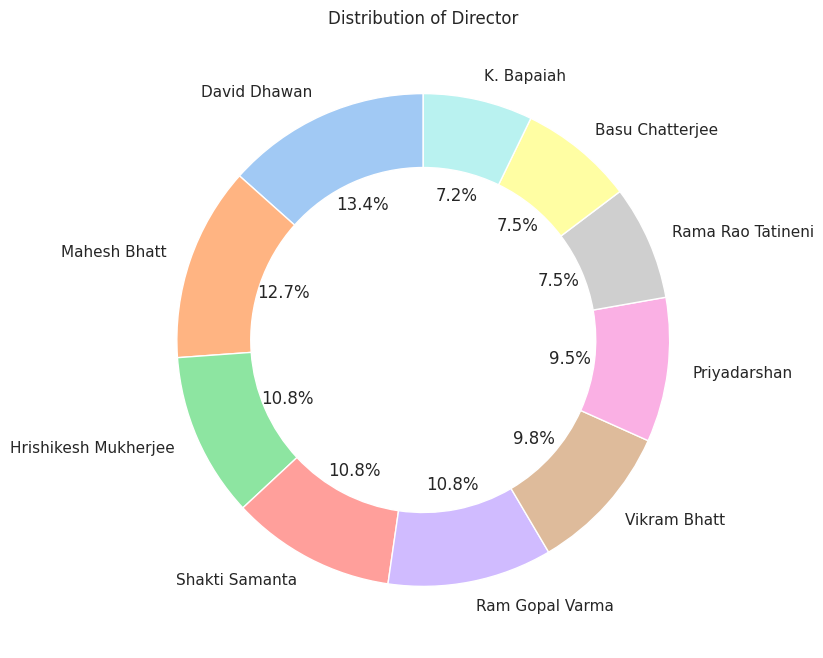

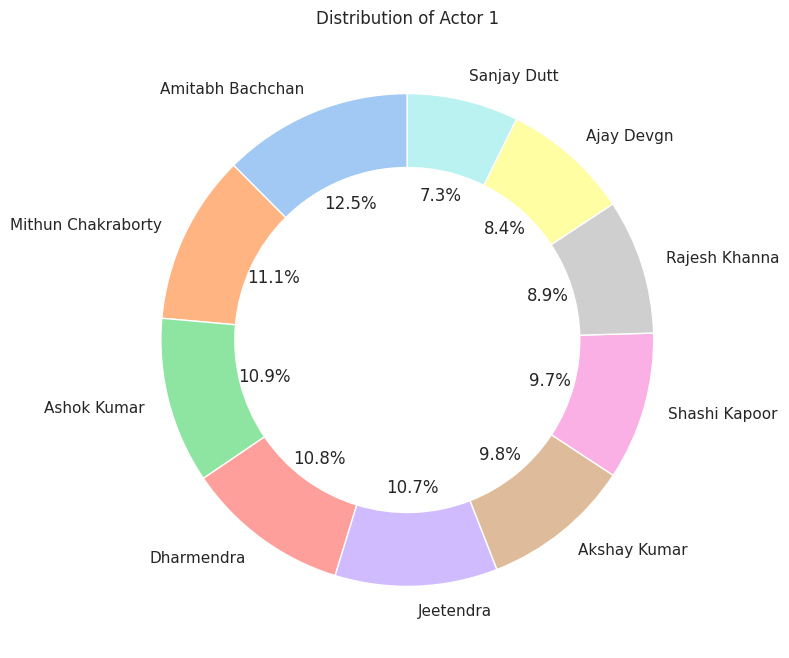

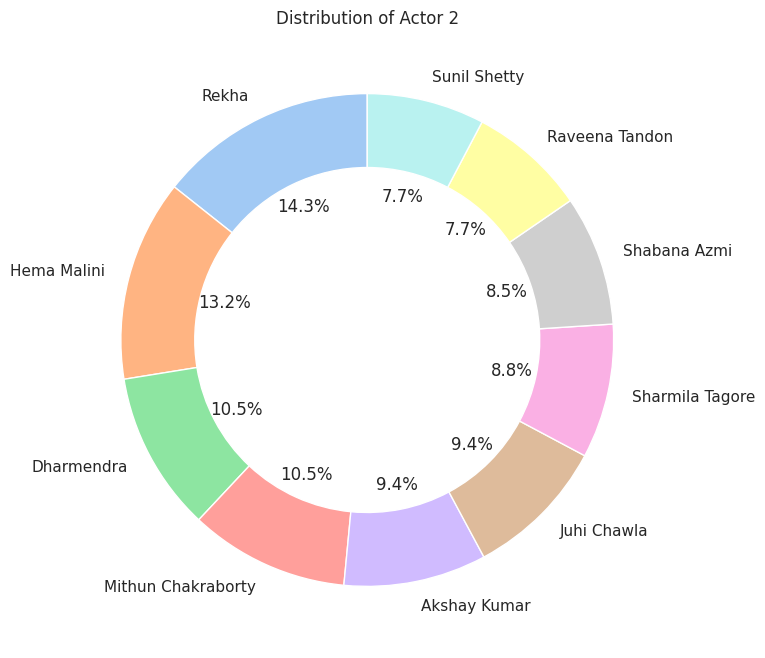

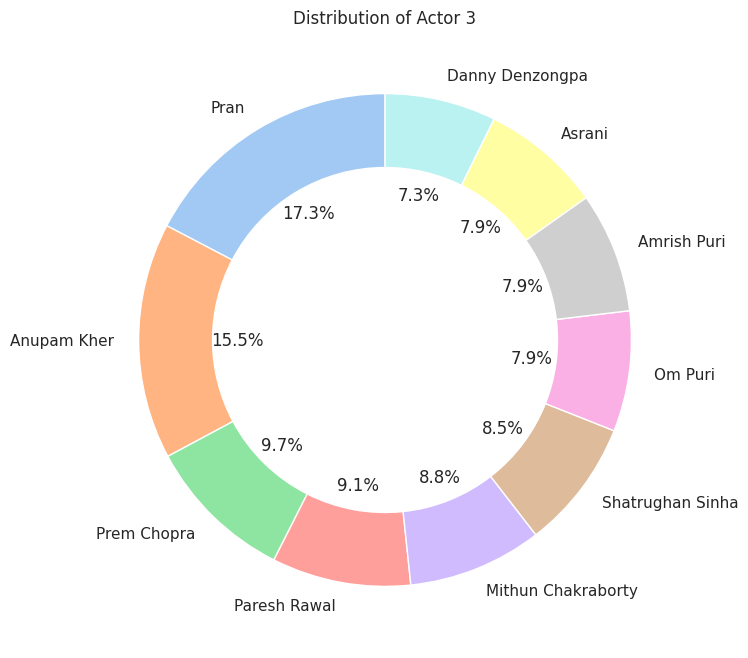

In [ ]:
# Function to plot pie chart
def plot_pie_chart(column):
    plt.figure(figsize=(8, 8))
    mydata[column].value_counts().head(10).plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), wedgeprops=dict(width=0.3))
    plt.title(f'Distribution of {column}')
    plt.ylabel('')
    plt.show()


def plot_hist_chart(column):
    plt.figure(figsize=(10, 5))
    mydata[column].hist()
    plt.title(f'{column} Distribution')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.show()
    # Plotting for each column
for col in mydata.columns:
    if mydata[col].dtype == 'object':
        plot_pie_chart(col)
    else:
        plot_hist_chart(col)

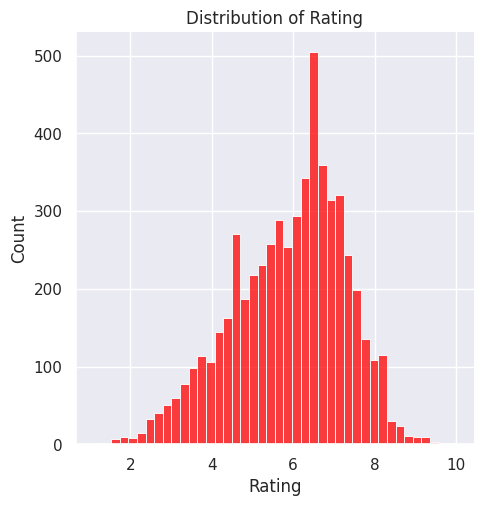

In [ ]:
sns.displot(x=mydata["Rating"],color="red")
plt.title("Distribution of Rating")
plt.show()

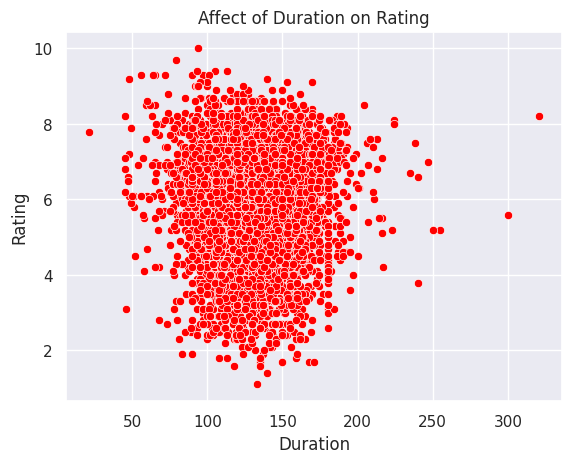

In [ ]:
sns.scatterplot(x=mydata["Duration"],y=mydata["Rating"],color="red")
plt.title("Affect of Duration on Rating")
plt.show()

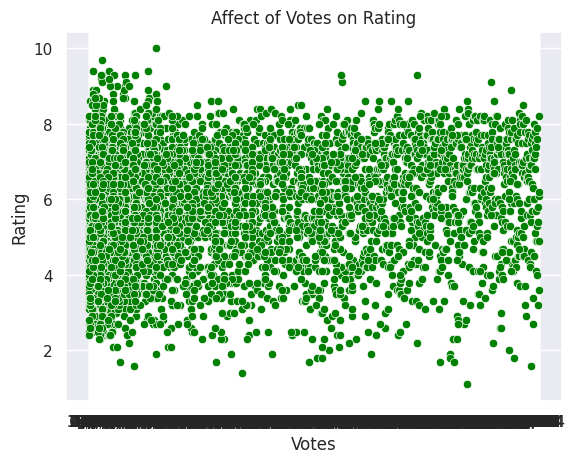

In [ ]:
sns.scatterplot(x=mydata["Votes"],y=mydata["Rating"],color="g")
plt.title("Affect of Votes on Rating")
plt.show()

In [ ]:
#target encoding
mydata["Genre"]=mydata.groupby("Genre")["Rating"].transform("mean")
mydata["Director"]=mydata.groupby("Director")["Rating"].transform("mean")
mydata["Actor 1"]=mydata.groupby("Actor 1")["Rating"].transform("mean")
mydata["Actor 2"]=mydata.groupby("Actor 2")["Rating"].transform("mean")
mydata["Actor 3"]=mydata.groupby("Actor 3")["Rating"].transform("mean")


In [ ]:
mydata.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,2019,109,6.415521,7.0,8,7.000000,6.850000,7.000000,7.000000
1,2019,110,5.716822,4.4,35,4.400000,5.420000,4.400000,4.450000
2,1997,147,6.167308,4.7,827,5.313333,4.788889,5.786667,5.872727
3,2005,142,6.820000,7.4,"1,086",7.383333,5.435000,6.933333,6.500000
4,2012,82,5.477778,5.6,326,5.600000,5.600000,5.883333,5.600000


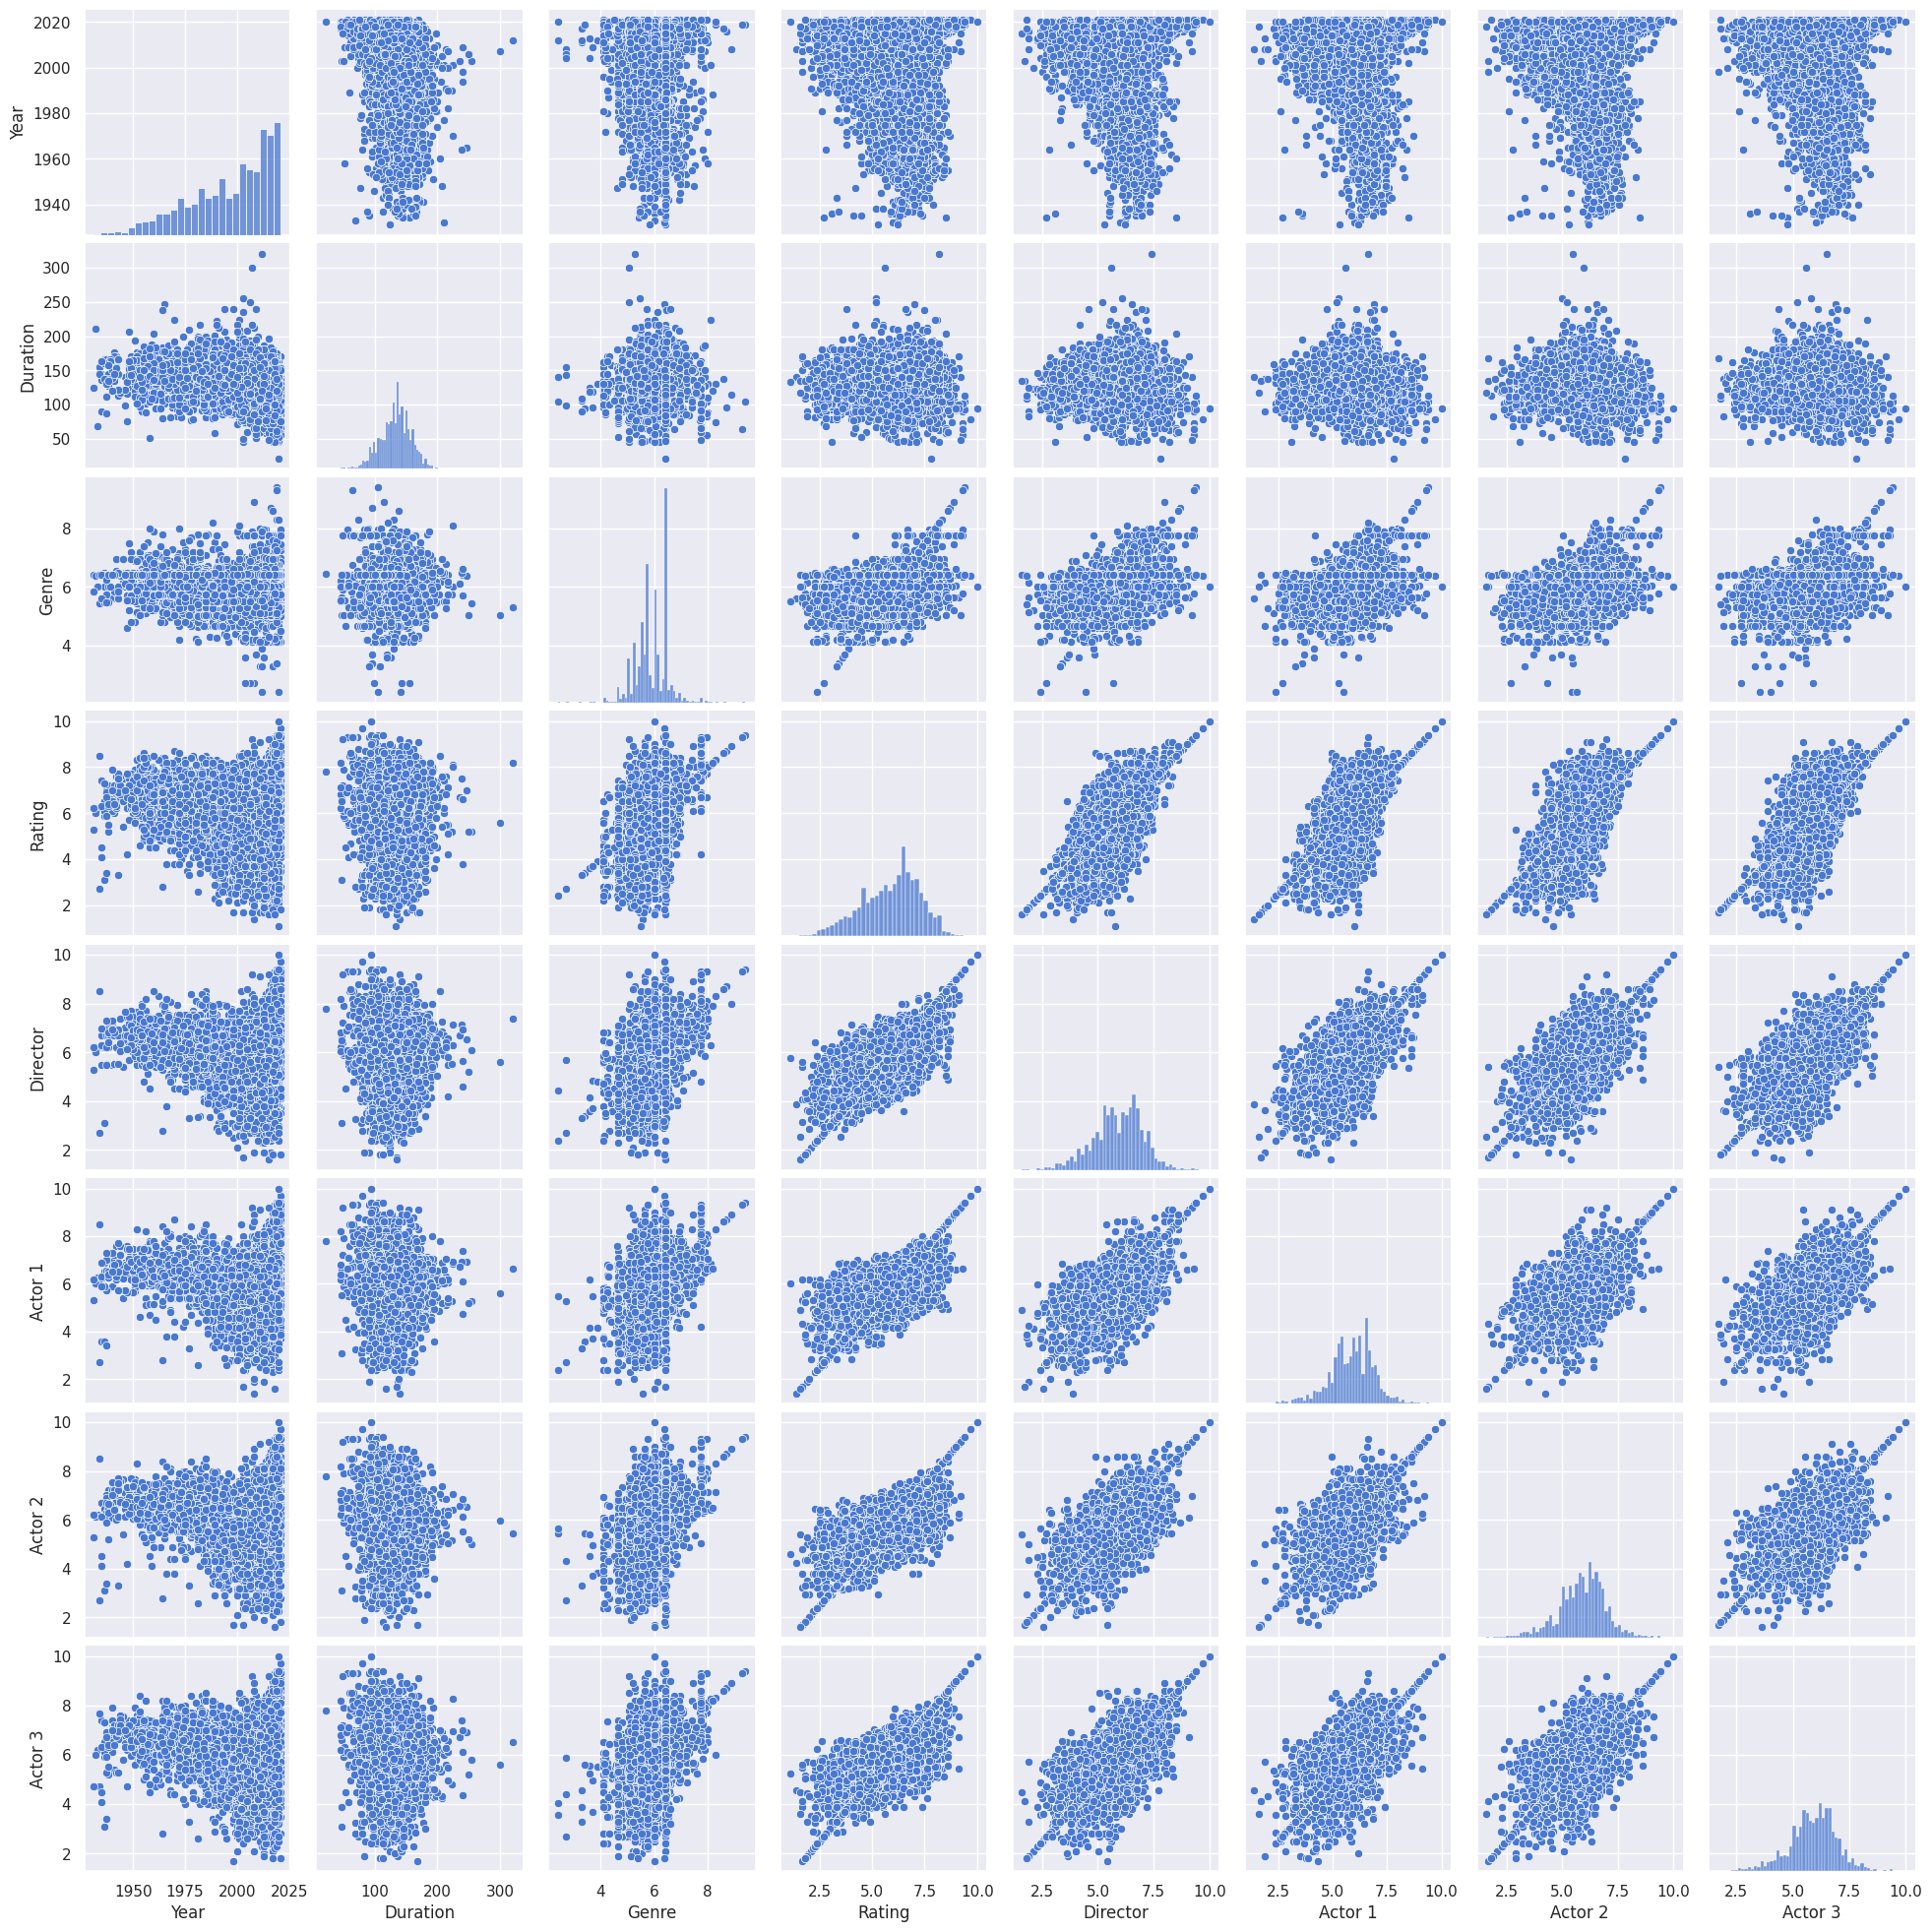

In [ ]:
sns.pairplot(mydata)

In [ ]:
from sklearn.linear_model import LinearRegression
x=mydata.drop("Rating",axis=1)
y=mydata["Rating"]
X = x.apply(pd.to_numeric, errors='coerce')
Y = x.apply(pd.to_numeric, errors='coerce')



In [ ]:
X.fillna(0, inplace=True)
Y.fillna(0, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model=LinearRegression().fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
mse=mean_squared_error(y_pred,y_test)
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_pred)

print("MSE FOR LR")
print(mse)


print("R2_SCORE FOR LR")
print(r2_score)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor().fit(x_train,y_train)
y_pred=model.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_pred)

print("MSE FOR DTR")
print(mse)


print("R2_SCORE FOR DTR")
print(r2_score)

In [ ]:
from sklearn.svm import SVR

model=SVR().fit(x_train,y_train)
y_pred=model.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_pred)

print("MSE FOR SVR")
print(mse)


print("R2_SCORE FOR SVR")
print(r2_score)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor().fit(x_train,y_train)
y_pred=model.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_pred)

print("MSE FOR RFR")
print(mse)


print("R2_SCORE FOR RFR")
print(r2_score)